# MNIST autoencoder from nnBuilder

A basic convolutional autoencoder for MNIST

In [1]:
import numpy as np
import tensorflow as tf
import sys, os, seaborn, time
import matplotlib.pyplot as plt
sys.path.append('../nnBuilder')
from nnLayer import *
from nnInput import *
from nnTrainer import *
from nnHandler import *
from nnAuto import *

In [2]:
data=Layer(type="MNIST",batch=128)
data_test=Layer(type="MNIST",test=True)
'''encoder=[]
encoder.append(dict(type="Convolution",pad="SAME",window=5,stride=1,size=2,relu=True))
encoder.append(dict(type="Pool",pad="SAME",window=2,stride=2,pool_type="max"))
encoder.append(dict(type="Convolution",pad="SAME",window=5,stride=1,size=4,relu=True))
encoder.append(dict(type="Pool",pad="SAME",window=2,stride=2,pool_type="max"))
decoder=[]
decoder.append(dict(type="Relu",size=49*4))
decoder.append(dict(type="Reshape",shape=[-1,7,7,4]))
decoder.append(dict(type="Convolution_Transpose",pad="SAME",window=5,stride=2,size=2,relu=True))
decoder.append(dict(type="Convolution_Transpose",pad="SAME",window=5,stride=2,size=1,relu=False))'''
#decoder.append(dict(type="Sigmoid_Feature"))
encoder=[]
encoder.append(dict(type="Relu",size=512))
encoder.append(dict(type="Relu",size=256))
decoder=[]
decoder.append(dict(type="Relu",size=256))
decoder.append(dict(type="Relu",size=512))
decoder.append(dict(type="Linear",size=784))
decoder.append(dict(type="Reshape",shape=[-1,28,28,1]))



autoencoder=Layer(x=data,type="Variational_Autoencoder",encoder=encoder,decoder=decoder,
                  mean=dict(type="Linear",size=2))
autoencoder_eval=autoencoder.copy(x=data,test=True)
autoencoder_test=autoencoder.copy(x=data_test,test=True)

trainer=LabeledTrainer(network=autoencoder,optimizer="adam",loss="network")
tester_eval=LabeledTrainer(network=autoencoder_eval,loss="network",test=True)
tester=LabeledTrainer(network=autoencoder_test,loss="network",test=True)

#trainer_start=LabeledTrainer(network=autoencoder,optimizer="adam",loss="mean_squared_error")

sess=SessManager()

Extracting /tmp/tensorflow/mnist/input_data\train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-labels-idx1-ubyte.gz


1.03811
1.02829


<IPython.core.display.Javascript object>


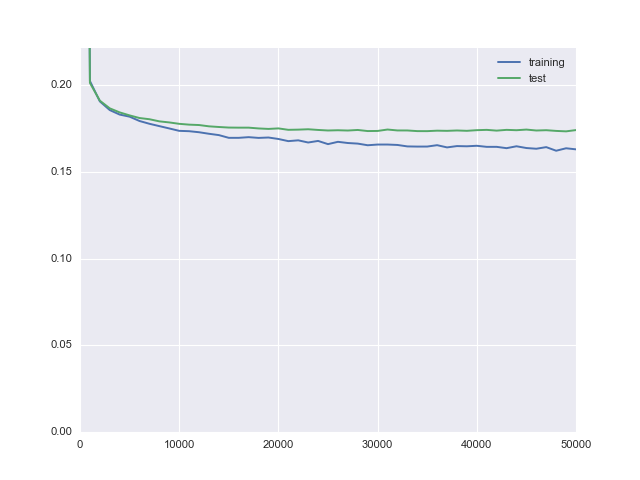

0.202366
0.201278


0.190631
0.191047


0.185619
0.186617


0.183017
0.184279


0.181815
0.182548


0.179317
0.18103


0.177713
0.180335


0.176363
0.17911


0.175021
0.178492


0.173637
0.177686


0.173438
0.177218


0.172838
0.176989


0.171953
0.176243


0.171184
0.17586


0.169609
0.175535


0.169611
0.175479


0.169999
0.175482


0.16957
0.175025


0.169795
0.174749


0.168948
0.17505


0.167706
0.174232


0.168169
0.174338


0.166916
0.174554


0.167823
0.174157


0.165979
0.17384


0.167315
0.173984


0.166623
0.173823


0.166282
0.174148


0.165335
0.173516


0.165736
0.17358


0.165744
0.174398


0.165507
0.173869


0.164665
0.173856


0.164567
0.173486


0.164581
0.173469


0.165375
0.173737


0.164094
0.173639


0.164856
0.17385


0.164735
0.17365


0.165026
0.174025


0.164409
0.174204


0.164415
0.173764


0.163647
0.17421


0.164747
0.174002


0.163732
0.174372


0.163323
0.173832


0.164253
0.174008


0.162173
0.1736


0.163593
0.173346


0.162964
0.174082


In [3]:
batches_per_step=1000#60000//128 #About 1 epoch
batches_per_eval=100
n_steps=50
#trainer_start.train(1000,learn_rate=1e-3)
def make_plt():
    %matplotlib notebook
    global fig,ax,train_plot,test_plot#,eval_plot
    fig,ax = plt.subplots(1,1)
    train_plot=ax.plot([],[], label="training")[0]
    #eval_plot=ax.plot([],[], label="eval")[0]
    test_plot=ax.plot([],[], label="test")[0]
    ax.set_ylim(0,1)
    plt.legend()
    fig.canvas.draw()
    time.sleep(.01)
def update_plt():
    x=[batches_per_step*i for i in range(len(trains))]
    train_plot.set_xdata(x)
    train_plot.set_ydata(trains)
    test_plot.set_xdata(x)
    test_plot.set_ydata(tests)
    #eval_plot.set_xdata(x)
    #eval_plot.set_ydata(evals)
    ax.set_xlim(0,x[-1])
    ax.set_ylim(0,tests[1]*1.1)
    fig.canvas.draw()
    #time.sleep(.01)
if "trains" not in globals():
    trains=[trainer.eval_loss(n=batches_per_eval)]
    #evals=[trainer_eval.eval_loss(n=batches_per_eval)]
    tests=[tester.eval_loss()]
make_plt()
for i in range(n_steps):
    trainer.train(batches_per_step,learn_rate=1e-3)
    trains.append(trainer.eval_loss(n=batches_per_eval)) 
    #evals.append(trainer_eval.eval_loss(n=batches_per_eval)) 
    tests.append(tester.eval_loss())
    show(-sess.run(autoencoder)[0,:,:,0])
    show(-autoencoder.generate()[0,:,:,0])
    update_plt()

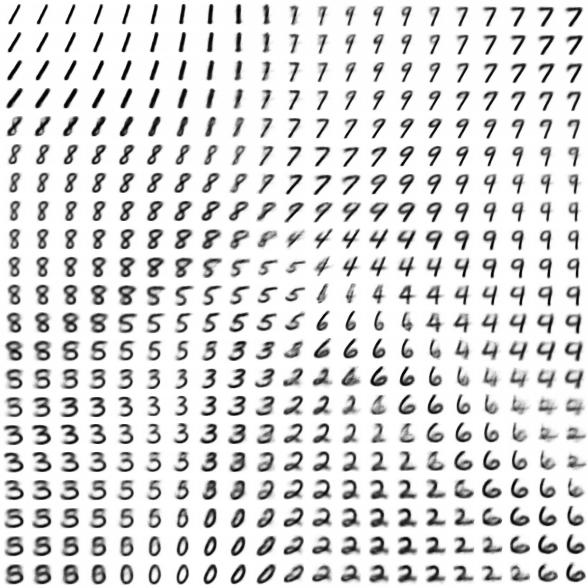

In [4]:
p=10
step=0.1
x=[[step*n,step*m] for n in range(-p,p+1) for m in range(-p,p+1)]
y=autoencoder.decode(x).reshape(2*p+1,2*p+1,28,28)
show(-composite(y))